# Exploratory Data Analysis for Telcom Customer Churn

In this project, I am going to do an analysis by exploring the data of Telcom Customer Churn using `Python`


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)

%matplotlib inline

/var/folders/hm/4gy529yx1ts3knwwpl0wm7bm0000gn/T/ipykernel_9319/3509854030.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path = '/Users/macbookair/Documents/Projects/telco_customer_churn/'
filename = 'Telco-Customer-Churn.csv'

df = pd.read_csv(path + filename)

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [7]:
df.eq(' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df.drop(df[df['TotalCharges'] == ' '].index)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [10]:
categorical = []
numeric = []
for col in df.columns:
    if df[col].dtypes == 'object':
        categorical.append(col)
    else:
        numeric.append(col)

for category in categorical[1:]:
    print(df[category].value_counts())
    print()

gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

StreamingTV
No                 

In [11]:
df[categorical].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [12]:
#check the correlation between the axis to the customer churn
df_corr = df.copy()
for col in df_corr[categorical]:
    df_corr[col].replace({"No phone service" : 0}, inplace=True)
    df_corr[col].replace({"No internet service" : 0}, inplace=True)
    df_corr[col].replace({"No" :  1}, inplace=True)
    df_corr[col].replace({"Yes" : 2}, inplace=True)

/var/folders/hm/4gy529yx1ts3knwwpl0wm7bm0000gn/T/ipykernel_9319/3215690932.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corr[col].replace({"No phone service" : 0}, inplace=True)
/var/folders/hm/4gy529yx1ts3knwwpl0wm7bm0000gn/T/ipykernel_9319/3215690932.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [13]:
df_corr.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,2,1,1,1,0,DSL,1,2,1,1,1,1,Month-to-month,2,Electronic check,29.85,29.85,1
1,5575-GNVDE,Male,0,1,1,34,2,1,DSL,2,1,2,1,1,1,One year,1,Mailed check,56.95,1889.50,1
2,3668-QPYBK,Male,0,1,1,2,2,1,DSL,2,2,1,1,1,1,Month-to-month,2,Mailed check,53.85,108.15,2
3,7795-CFOCW,Male,0,1,1,45,1,0,DSL,2,1,2,2,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,9237-HQITU,Female,0,1,1,2,2,1,Fiber optic,1,1,1,1,1,1,Month-to-month,2,Electronic check,70.70,151.65,2


<Axes: >

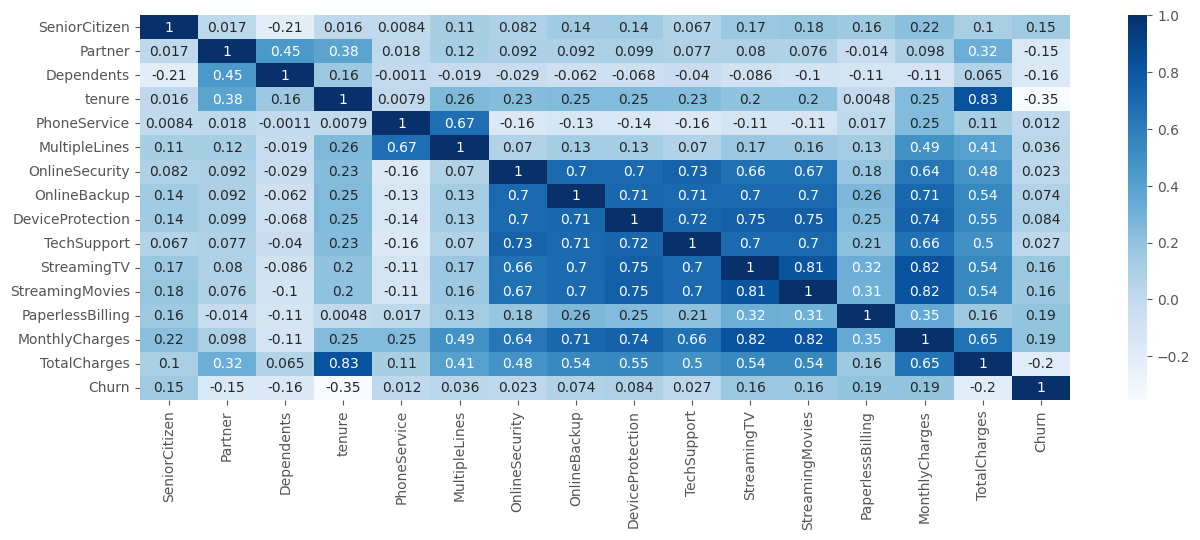

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df_corr.corr(numeric_only = True),cbar=True,annot=True,cmap='Blues')

Pada analisis univariate data, kita bagi ke 3 bagian jenis data yang mengelompokan kolom2nya

1. Categorical variable
   gender, partner, dependents, phoneservice, multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport
   streamingtv, streamingmovies, paperlessbilling, churn
   
2. Ordinal variable
   internetservice, contract, paymentmethod
   
3. Numerical variable
   seniorcitizen, tenure,monthlycharges, totalcharges

In [15]:
category_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling']

ordinal_columns = ['InternetService', 'Contract', 'PaymentMethod']

numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
def categorical_plots(df, category, type):

    num_cols = 3
    length = len(category)
    num_rows = length // 3 + 1 if length % 3 != 0 else length // 3 

    if type == 'categorical':
        size_x, size_y = (15, 9)
    elif type == 'ordinal' :
        size_x, size_y = (15,4)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(size_x,size_y))

    colors = ['#EC7063', '#A569BD','#EC407A', '#2196F3', '#00ACC1', '#FB8C00']
              
    for index, axes in enumerate(axs.flatten()[:length]):
        df[category[index]].value_counts(normalize=False).plot(kind='bar',
                                                               ax = axes, 
                                                               title = category[index].capitalize(),
                                                               color = colors[index]).set_xlabel("")
        axes.set_ylim(0,10000)

        if type == 'categorical':
            axes.tick_params(axis='x', rotation=0)
        elif type == 'ordinal':
            axes.tick_params(axis='x', rotation=45)
    
        position = df[category[index]].value_counts(normalize=True)
        get_position = df[category[index]].value_counts(normalize=False).to_list()
        data_point = position.apply(lambda x : x*100).astype('str').apply(lambda x : x[:5] +" %").tolist()

        for i in range(len(get_position)):
            axes.text(i, get_position[i] + 200, data_point[i], 
                      ha='center', color = 'black', fontsize=10)
    
    plt.subplots_adjust(wspace=0.2, 
                        hspace=0.3)
    
    #plt.savefig(path + f'uninvariate-{type}-value.png')

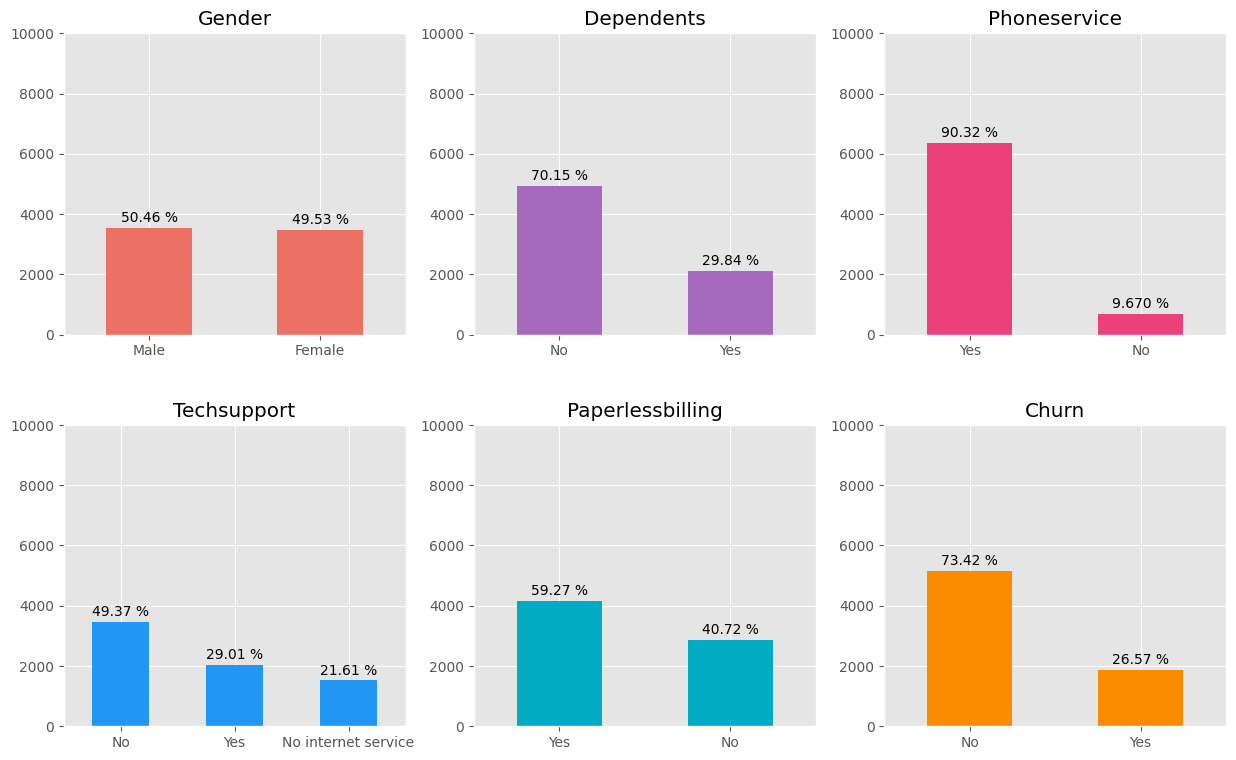

In [17]:
category = ['gender', 'Dependents', 'PhoneService',
            'TechSupport', 'PaperlessBilling', 'Churn']
categorical_plots(df, category, 'categorical')

Untuk churn, ternyata keliatan ada no yang 73,xx % dan yes ada 26 %
artinya ternyata ada 73 % lho orang yang tetap menggunakan service/product telkom komunikasi
dan 26 % nya cabut ga pake lagi

ada pertanyaan?
kenapa 26 % cabut? 

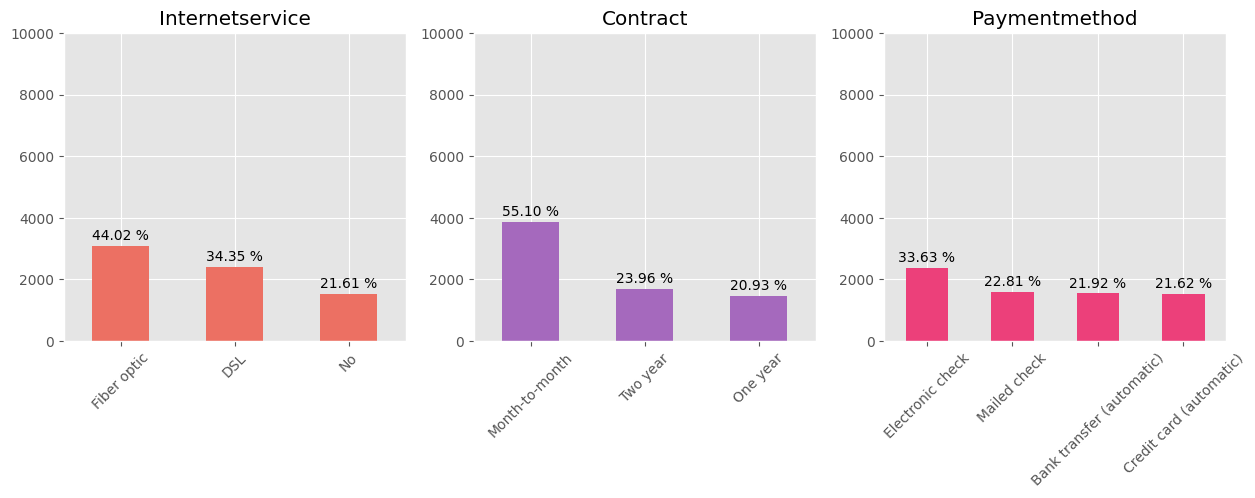

In [18]:
categorical_plots(df, ordinal_columns, 'ordinal')

In [19]:
def numeric_plot(df, numerical, type):
    
    numeric = numerical_columns[1:]
    columns = ['Tenure', 'Monthly Charges', 'Total Charges']
    
    fig_num, axes_num = plt.subplots(1,3, figsize= (18,5))

    colors = ['#EC407A', '#A569BD','#00ACC1']
    
    for index, axes in enumerate(axes_num.ravel()):
        if type == 'hist':
            plot = sns.histplot(df[numeric[index]], 
                                kde=True, ax=axes, color = colors[index])
        elif type == 'box':
            plot =  sns.boxplot(df[numeric[index]], 
                                ax=axes, color = colors[index])
        plot.set(xlabel = '', ylabel='Frequency', title = columns[index])
        
        
    fig_num.tight_layout()
    #plt.savefig(path + f'numeric-{type}-value.png')


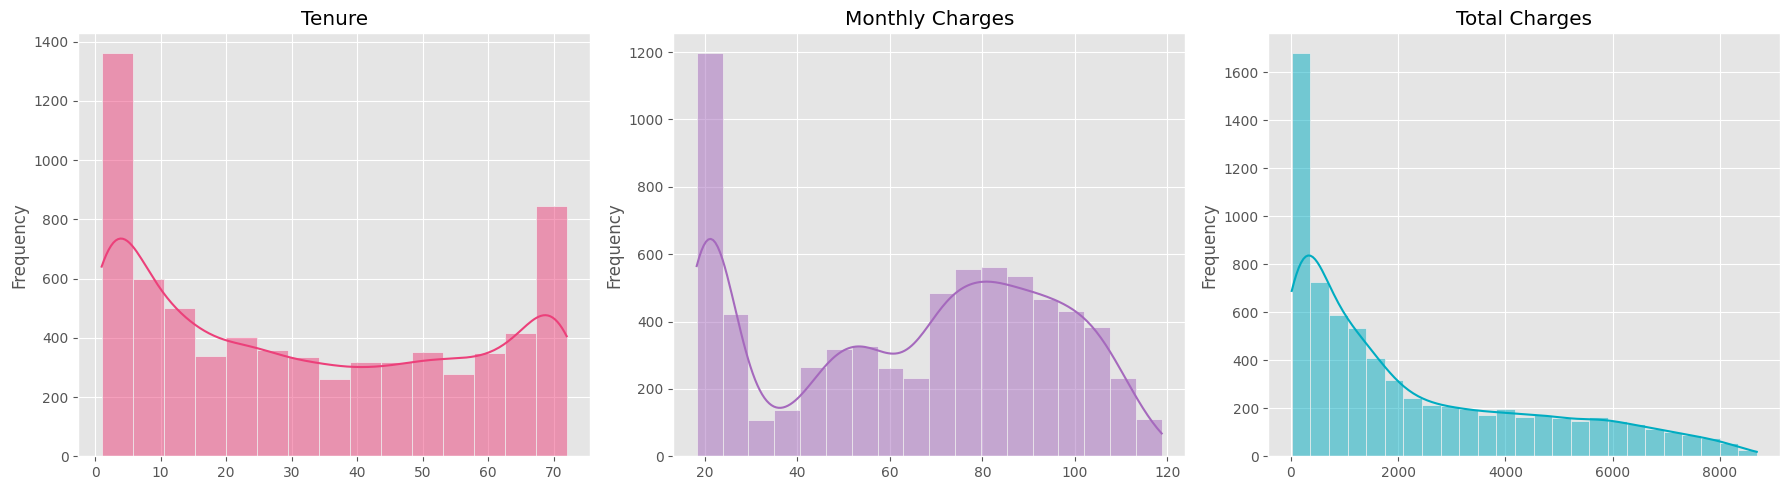

In [20]:
numeric_plot(df, numerical_columns, 'hist')

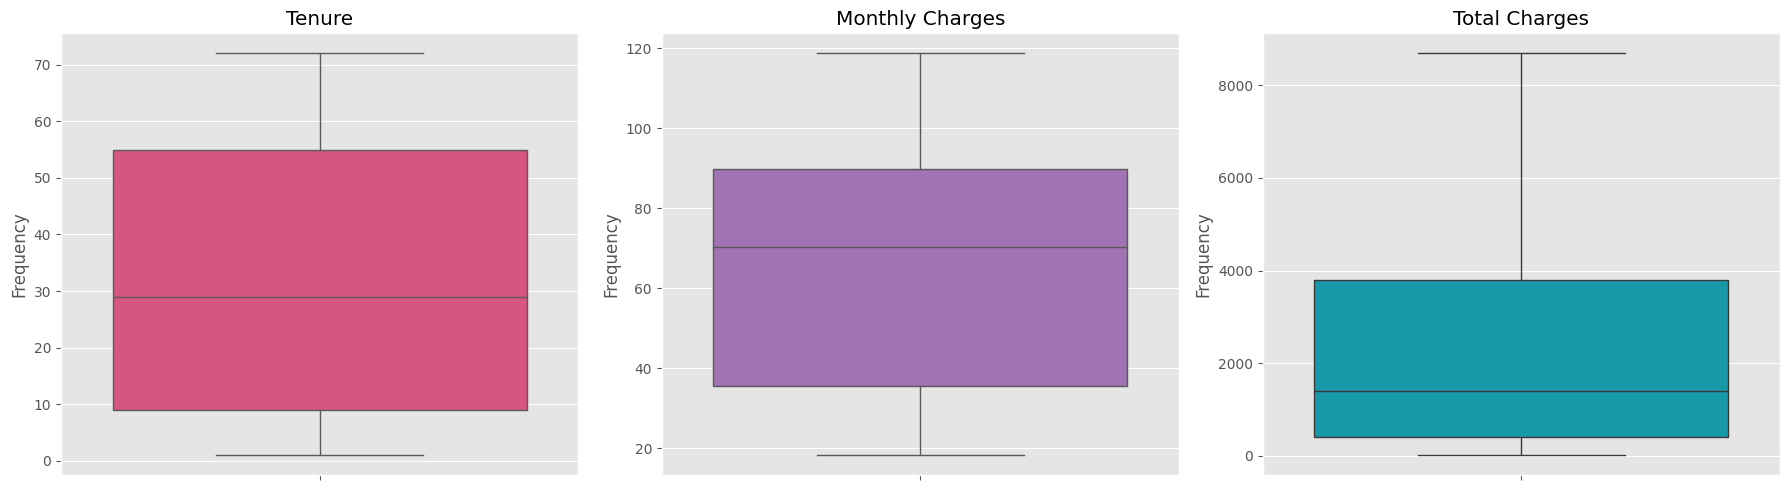

In [21]:
numeric_plot(df, numerical_columns, 'box')

In [66]:
def bivariate_bar_plot(df, ordinal_columns, target_variabel, type):

    if type == 'bar':
    
        fig, axs = plt.subplots(1, 3, figsize=(12,5))
    
        colors = ["Set2", "flare"]
        
        for index, axes in enumerate(axs.flatten()):
            
            plot = sns.countplot(x = ordinal_columns[index], hue = target_variabel, data=df, 
                                 ax = axes, palette = colors[index])
        
            plot.set(xlabel='', ylabel = 'Frequency', title=ordinal_columns[index])
                        
            for index, p in enumerate(axes.patches):    
                height = p.get_height()
                x = p.get_x() + (p.get_width()/2)
                if x != 0.0:
                    axes.text(x, y = height + 30, s = '{:.0f}'.format(height), ha = 'center')
                    
    elif type == 'barstacked':
        
        fig, axs = plt.subplots(1,3, figsize = (18,5))
    
        colors = [['tomato','lightseagreen'], ['#A569BD','#00ACC1'], ['#00ACC1', '#FB8C00']]
        
        for index, axes in enumerate(axs.flatten()):
            df_stack = df.groupby([target_variabel, ordinal_columns[index]]).size().reset_index()
            df_stack = df_stack.pivot(columns= target_variabel, index= ordinal_columns[index], values=0)
            df_reverse = df_stack[df_stack.columns[::-1]]
            
            df_reverse.plot(kind='bar', stacked=True, ax = axes, 
                            title = ordinal_columns[index], color = colors[index],
                            ylabel = 'Frequency').set_xlabel("")
        
            axes.tick_params(axis='x', rotation=0)
            
            for c in axes.containers:
                label = [int(l.get_height()) for l in c]
                axes.bar_label(c, labels = label, label_type = 'edge') 

    #plt.savefig(path + f'bivariate-{type}-value.png')


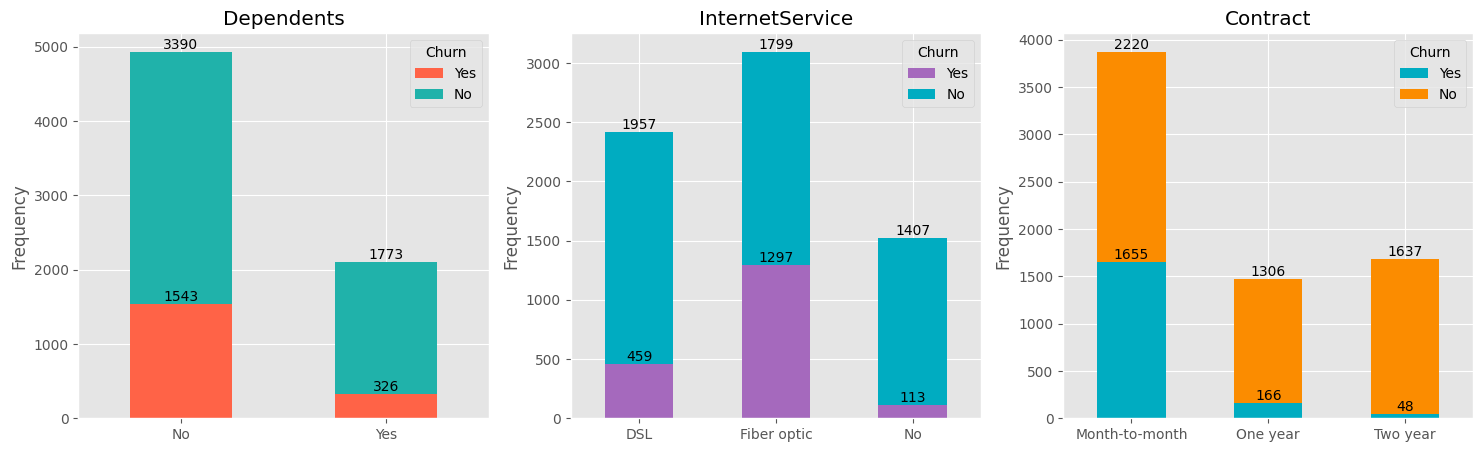

In [67]:
columns = ['Dependents', 'InternetService', 'Contract']
bivariate_bar_plot(df, columns, 'Churn', 'barstacked')

In [57]:
def multivariate_plots(df, numeric, category, target_variable):
    
    bin = np.linspace(df[numeric].min(), df[numeric].max(), 50)
    graph = sns.FacetGrid(df, col=category, hue = target_variable, palette="Set2", 
                          col_wrap=3, height = 7, aspect=1.1)
    graph.map(plt.hist, numeric, bins=bin, ec="k")
    
    for ax in graph.axes.ravel():
        ax.legend(title= target_variable)
        
    graph.set(ylabel = 'Frequency', xlabel= numeric)

    #plt.savefig(path + 'multivariate-value.png')
    
    plt.show()

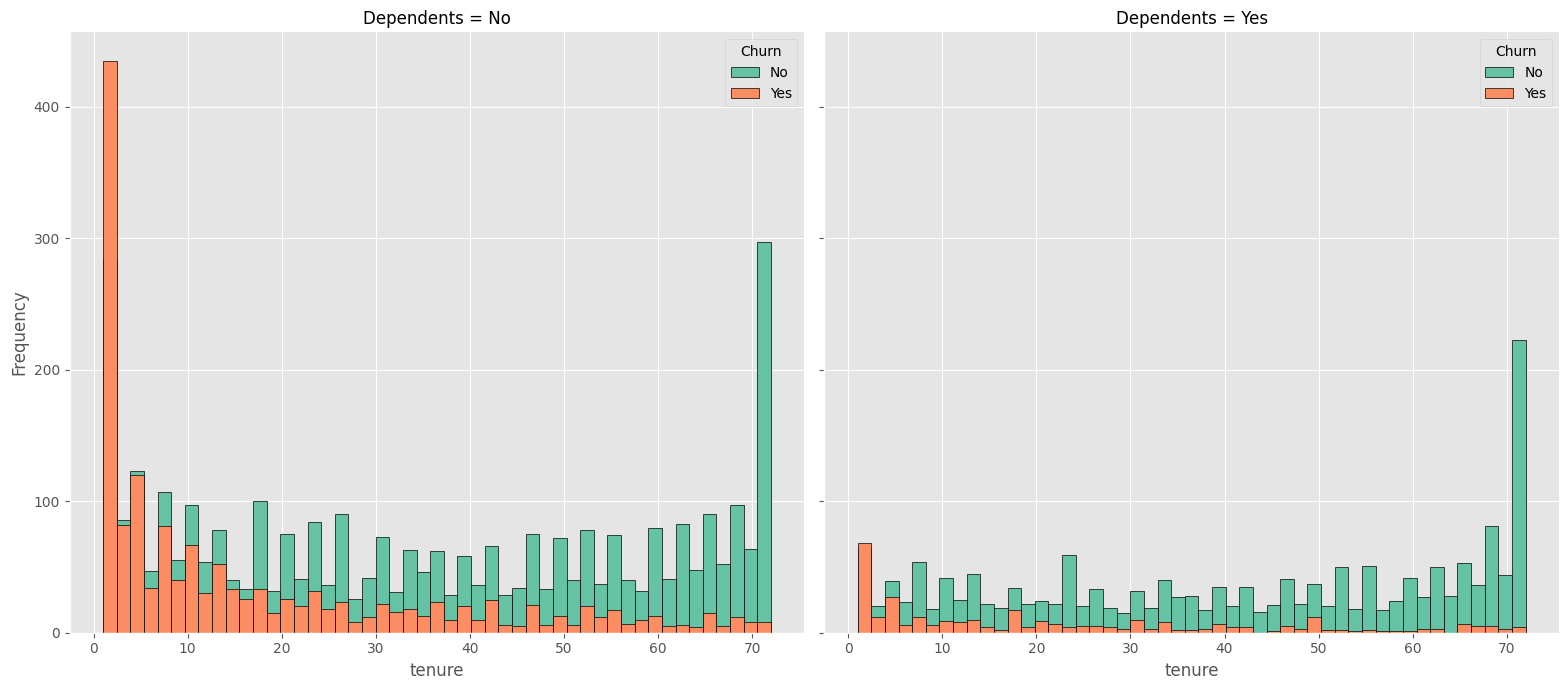

In [68]:
multivariate_plots(df, 'tenure', 'Dependents', 'Churn')

How does customers churn relate to having dependents, types of internet service, contract choices, and how long they've been using the service?

[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Frequency')]

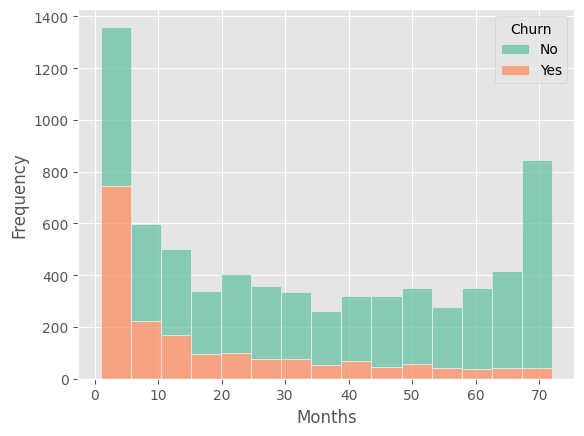

In [74]:
plot = sns.histplot(data= df, x = 'tenure', hue = 'Churn', palette = 'Set2', multiple = 'stack')
plot.set(xlabel = 'Months', ylabel = 'Frequency')

Apakah lama waktu pemakaian service telkom berpengaruh pada customer churn rate ? 

Aws : ternyata, customer cenderung tidak menggunakan service telkom di 5 bulan pertama pemakaian mereka. Hal ini dapat ditunjukan besarnya frequency customer yang churn di rentang waktu tersebut